In [ ]:
#importing all the necessary libraries

In [130]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns



In [ ]:
#Loading the csv file in a dataframe

In [57]:
df = pd.read_csv('/Users/ashwinrajh/Desktop/Programming/Final Projects/Project 1_CreditCard/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
df.shape

(284807, 31)

In [ ]:
#checking for any preprocessing steps

In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [115]:
sum1 =0
for i in df['Class']:
    if(i == 0):
        sum1 =sum1 + 1
sum1

284315

In [ ]:
#Check for null values

In [62]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [63]:
df['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

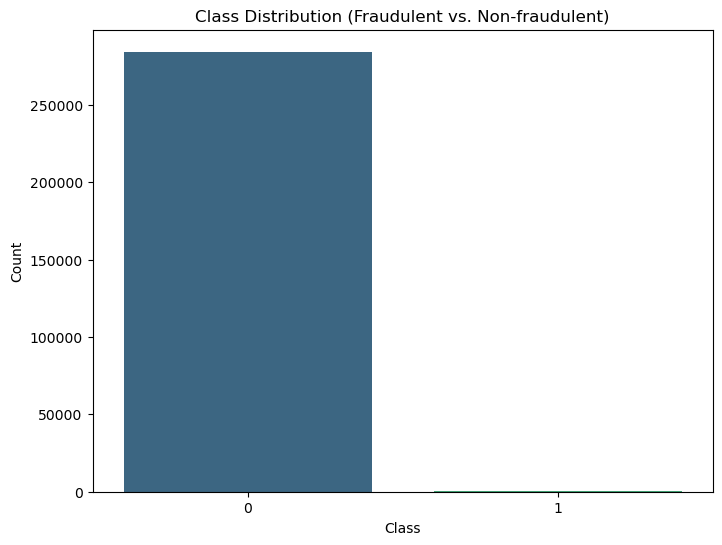

In [150]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (Fraudulent vs. Non-fraudulent)')

# Show the plot
plt.show()

In [ ]:
#Finding Correlation between Class column with other columns

In [ ]:
#choosing k=21 based on threshold chosen

In [126]:
df.corr()['Class'].abs().sort_values(ascending=False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

In [141]:
k = 21
top_features = df.corr()['Class'].abs().sort_values(ascending=False).head(k).index
top_features

Index(['Class', 'V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4',
       'V18', 'V1', 'V9', 'V5', 'V2', 'V6', 'V21', 'V19', 'V20', 'V8', 'V27'],
      dtype='object')

In [142]:
#These 21 features are the most useful to predict "Class".

In [143]:
df_selected = df[top_features]
df_selected

,Class,V17,V14,V12,V10,V16,V3,V7,V11,V4,...,V1,V9,V5,V2,V6,V21,V19,V20,V8,V27
0,0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,2.536347,0.239599,-0.551600,1.378155,...,-1.359807,0.363787,-0.338321,-0.072781,0.462388,-0.018307,0.403993,0.251412,0.098698,0.133558
1,0,-0.114805,-0.143772,1.065235,-0.166974,0.463917,0.166480,-0.078803,1.612727,0.448154,...,1.191857,-0.255425,0.060018,0.266151,-0.082361,-0.225775,-0.145783,-0.069083,0.085102,-0.008983
2,0,1.109969,-0.165946,0.066084,0.207643,-2.890083,1.773209,0.791461,0.624501,0.379780,...,-1.358354,-1.514654,-0.503198,-1.340163,1.800499,0.247998,-2.261857,0.524980,0.247676,-0.055353
3,0,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,1.792993,0.237609,-0.226487,-0.863291,...,-0.966272,-1.387024,-0.010309,-0.185226,1.247203,-0.108300,-1.232622,-0.208038,0.377436,0.062723
4,0,-0.237033,-1.119670,0.538196,0.753074,-0.451449,1.548718,0.592941,-0.822843,0.403034,...,-1.158233,0.817739,-0.407193,0.877737,0.095921,-0.009431,0.803487,0.408542,-0.270533,0.219422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,1.991691,4.626942,2.711941,4.356170,1.107641,-9.834783,-4.918215,-1.593105,-2.066656,...,-11.881118,1.914428,-5.364473,10.071785,-2.606837,0.213454,-0.682920,1.475829,7.305334,0.943651
284803,0,-0.025693,-0.675143,0.915802,-0.975926,-0.711757,2.035030,0.024330,-0.150189,-0.738589,...,-0.732789,0.584800,0.868229,-0.055080,1.058415,0.214205,-1.545556,0.059616,0.294869,0.068472
284804,0,0.313502,-0.510602,0.063119,-0.484782,0.140716,-3.249640,-0.296827,0.411614,-0.557828,...,1.919565,0.432454,2.630515,-0.301254,3.031260,0.232045,-0.577252,0.001396,0.708417,0.004455
284805,0,0.509928,0.449624,-0.962886,-0.399126,-0.608577,0.702510,-0.686180,-1.933849,0.689799,...,-0.240440,0.392087,-0.377961,0.530483,0.623708,0.265245,2.897849,0.127434,0.679145,0.108821


In [148]:
correlation_matrix = df_selected.corr()
class_correlation = correlation_matrix['Class'].to_frame()


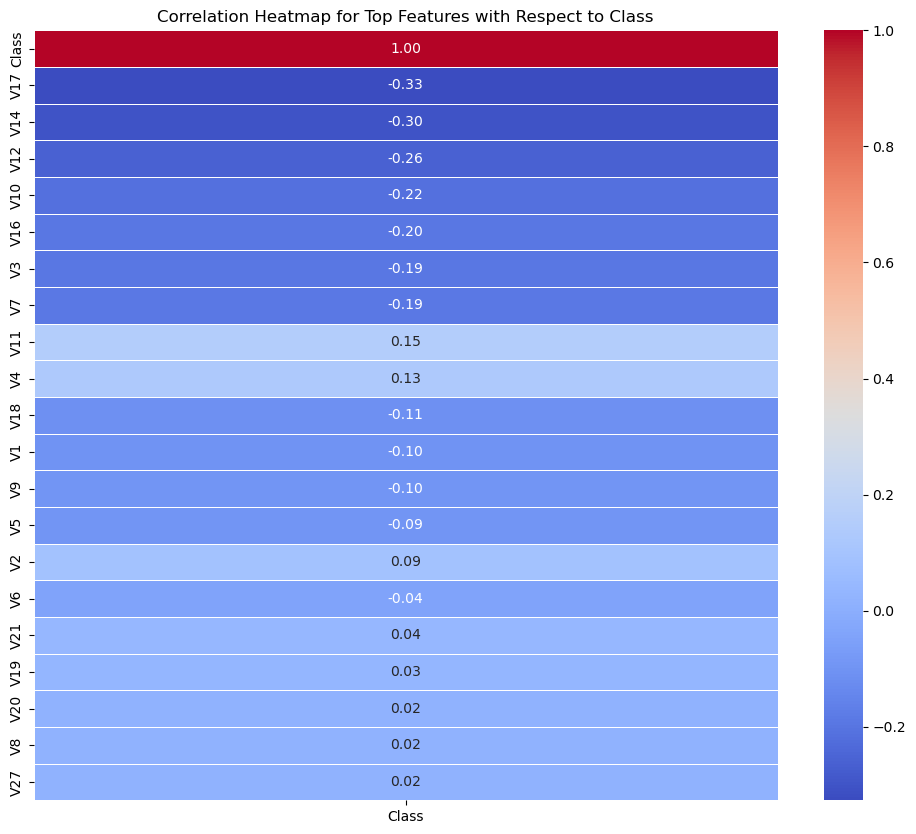

In [149]:
plt.figure(figsize=(12, 10))
sns.heatmap(class_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Top Features with Respect to Class')
plt.show()

In [ ]:
#Now using the entire dataframe we are getting both the features in X and Target i.e class in Y

In [64]:
X = df.drop('Class', axis = 1).values
Y = df['Class'].values

In [65]:
X[0]

array([ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,  2.53634674e+00,
        1.37815522e+00, -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,
        9.86979013e-02,  3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
       -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,  1.46817697e+00,
       -4.70400525e-01,  2.07971242e-01,  2.57905802e-02,  4.03992960e-01,
        2.51412098e-01, -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
        6.69280749e-02,  1.28539358e-01, -1.89114844e-01,  1.33558377e-01,
       -2.10530535e-02,  1.49620000e+02])

In [66]:
Y

array([0, 0, 0, ..., 0, 0, 0])

# Applying PCA Framework

In [ ]:
#Standardising X and applying PCA. Plotting Number of Principal Components vs Cumulative Explained Variance
# To get the number of components to retain 95% variance

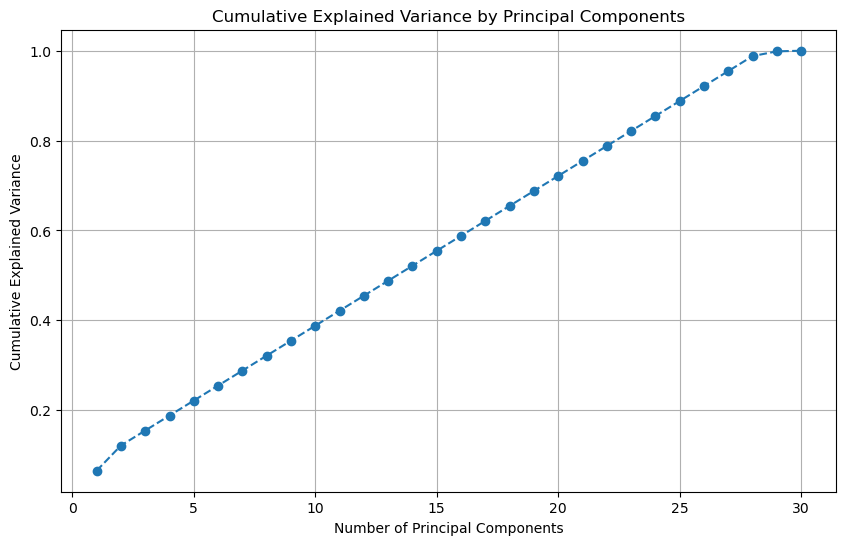

In [101]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [102]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components_for_95_variance = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to retain 95% variance:", num_components_for_95_variance)


Number of components to retain 95% variance: 27


In [ ]:
#Saving that data in X_selected_pca

In [103]:
X_selected_pca = X_pca[:, :num_components_for_95_variance]

In [ ]:
Here, in credit card frauds, minimising false negative is more important than false positive, 
hence we are going to calcualte for recall

In [ ]:
#Logistic Regression Model

In [124]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

skf = StratifiedKFold(n_splits = 5)

hyper_params = {'LR__penalty':['l1','l2','elasticnet','none'],
                'LR__C':np.linspace(1, 10, 10), # Inverse of alpha
                'LR__l1_ratio':np.linspace(0.001,0.9999, 5), # only applicable for elasticnet
                'LR__class_weight':[{0:1,1:90},{0:1,1:100},{0:1,1:110}] #{Class0:weight,Class1:weight}
               }


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mysteps = [('ss',StandardScaler()), ('LR',LogisticRegression(random_state=1, solver = 'saga', max_iter = 1000, tol = 0.001))]

m_pipe = Pipeline(steps = mysteps)

rcv = RandomizedSearchCV(m_pipe, param_distributions = hyper_params, cv = skf, scoring = 'recall')
rcv.fit(X_selected_pca, Y)

/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('LR',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=1,
                                                                 solver='saga',
                                                                 tol=0.001))]),
                   param_distributions={'LR__C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                                        'LR__class_weight': [{0: 1, 1: 90},
                                                             {0: 1, 1: 100},
                                                             {0: 1, 1: 110}],
                                        'LR__l1_ratio': array([0.001   , 0.250725, 0.50045 , 0.750175, 0.9999  ]),
                                        'LR__penalty': ['l1', 'l2',
                                                        'elasticnet', 'none']},
                   scoring='recall')

In [127]:
rcv.best_params_#Logistic Regression

{'LR__penalty': 'l2',
 'LR__l1_ratio': 0.250725,
 'LR__class_weight': {0: 1, 1: 90},
 'LR__C': 7.0}

In [128]:
rcv.best_score_#Logistic Regression

0.8535765821480107

In [ ]:
#Linear SVC Model

In [129]:
from sklearn.svm import LinearSVC # Only gives you a linear function

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

skf = StratifiedKFold(n_splits = 5)

hyper_params = {'svc__penalty':['l1','l2'],
                'svc__loss':['hinge', 'squared_hinge'],
                'svc__C':np.linspace(1,100, 20), 
                'svc__class_weight':[{0:1,1:90},{0:1,1:100},{0:1,1:110}]
               }


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mysteps = [('ss',StandardScaler()), ('svc',LinearSVC(random_state=1, max_iter = 1000, tol = 0.001))]

m_pipe = Pipeline(steps = mysteps)

rcv = RandomizedSearchCV(m_pipe, param_distributions = hyper_params, cv = skf, scoring = 'recall')

rcv.fit(X_selected_pca, Y)

/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

/Users/ashwinrajh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('svc',
                                              LinearSVC(random_state=1,
                                                        tol=0.001))]),
                   param_distributions={'svc__C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                                        'svc__class_weight': [{0: 1, 1: 90},
                                                              {0: 1, 1: 100},
                                                              {0: 1, 1: 110}],
                                        'svc__loss': ['hinge', 'squared_hinge'],
                                        'svc__penalty': ['l1', 'l2']},
                   scoring='recall')

In [131]:
rcv.best_params_#LinearSVC

{'svc__penalty': 'l2',
 'svc__loss': 'hinge',
 'svc__class_weight': {0: 1, 1: 90},
 'svc__C': 100.0}

In [132]:
rcv.best_score_ #LinearSVC

0.7864357864357864

In [ ]:
# Decision Tree Model

In [108]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
skf = StratifiedKFold(n_splits = 5)

model = DecisionTreeClassifier(random_state = 1)

hyper_params = {'criterion':['gini', 'entropy'], # 'log_loss'
                'splitter':['best','random'],
                'max_depth':range(2,7)
                }


gcv = GridSearchCV(model, param_grid = hyper_params, cv = skf, scoring = 'recall')
gcv.fit(X_selected_pca, Y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 7),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [112]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [113]:
gcv.best_score_#Decision Tree

0.745578231292517